# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM



## Load data

In [17]:
data = pd.read_csv('stock_prices.csv')

## Clean data

In [5]:
data.dropna(inplace=True)

## Preprocess data

In [6]:
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close']])
data['Volume'] = scaler.fit_transform(data['Volume'].values.reshape(-1,1))


## Feature selection

In [7]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

## Split data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Reshape data to be 3D for LSTM model

In [9]:
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))


## Define LSTM model architecture

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


## Compile the model

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')

## Train the model


In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
490/490 [==============================] - 11s 13ms/step - loss: 9.6751e-04 - val_loss: 1.8702e-05
Epoch 2/50
490/490 [==============================] - 4s 9ms/step - loss: 2.2236e-05 - val_loss: 1.6412e-05
Epoch 3/50
490/490 [==============================] - 4s 8ms/step - loss: 2.3081e-05 - val_loss: 3.6762e-05
Epoch 4/50
490/490 [==============================] - 5s 10ms/step - loss: 1.9777e-05 - val_loss: 1.4147e-05
Epoch 5/50
490/490 [==============================] - 4s 9ms/step - loss: 2.2102e-05 - val_loss: 2.3449e-05
Epoch 6/50
490/490 [==============================] - 4s 9ms/step - loss: 2.2503e-05 - val_loss: 1.1186e-05
Epoch 7/50
490/490 [==============================] - 5s 10ms/step - loss: 1.8658e-05 - val_loss: 1.5907e-05
Epoch 8/50
490/490 [==============================] - 4s 9ms/step - loss: 1.7145e-05 - val_loss: 3.4500e-05
Epoch 9/50
490/490 [==============================] - 4s 8ms/step - loss: 2.2094e-05 - val_loss: 7.4317e-06
Epoch 10/50
490/490 [===

## Evaluate the model

In [13]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

123/123 [==============================] - 1s 3ms/step
RMSE: 0.0033642909286923837


## Visualize training and validation loss

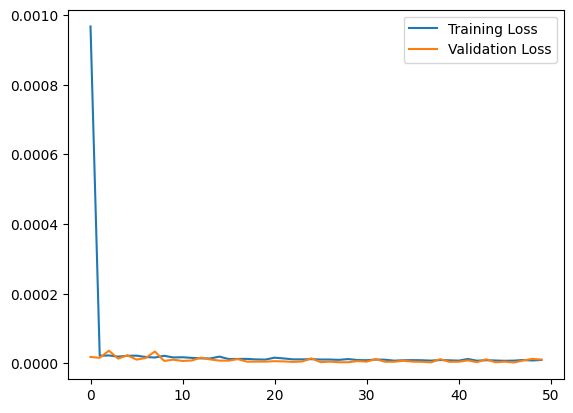

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Visualize actual vs. predicted stock prices

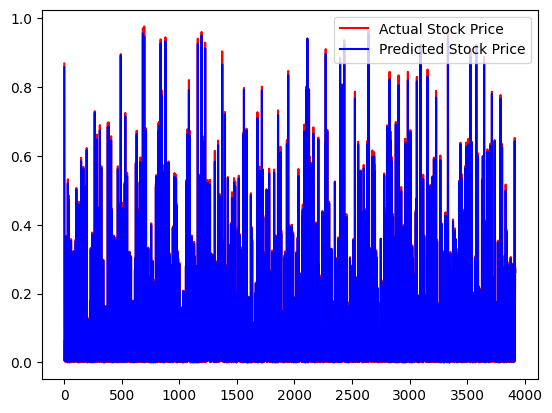

In [15]:
plt.plot(y_test.values, color='red', label='Actual Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Stock Price')
plt.legend()
plt.show()